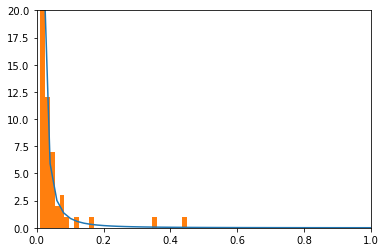

In [40]:
import numpy as np
import scipy as sp
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt

# Define classes
class Agent_gen():
    """Class of agents, holding opinion and being more or less active.
    Each agent shall act like a socially embedded human."""
    def __init__(self, name, opinion_0, activity_0):
        self.name = name
        self.x_i = opinion_0
        self.a_i = activity_0

class F_gen(rv_continuous):
    """Activitiy sampling distribution identical to Baumann et al.
    It models the intuitive assumption, that by far most people
    are hardly posting on social media, and even less people being
    very active. 
    

    For Reference, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous"""
    # define probability distribution as the paper's "F(a)"
    def _pdf(self, x):
        return ((1-gamma)/(1-epsilon**(1-gamma)))*x**(-1*gamma)

class RK_gen(sp.integrate.RK45):
    #"""(fun, t0, y0, t_bound, max_step=inf, rtol=0.001, atol=1e-06, vectorized=False, first_step=None, **extraneous):
    name = 'd'

# Define methods
def dx_gen(x, i, alpha, K):
    sum_tmp = 0
    for j in range(N):
        sum_tmp = sum_tmp+A[i][j]*np.tanh(alpha*x[j])
    return -x+K*sum_tmp

def p_ij(i, j):
    sum_tmp = 0
    for j_tmp in range(N):
        sum_tmp = sum_tmp+abs(x[i]-x[j_tmp])**(-beta)
    return (abs(x[i]-x[j])**(-beta))/sum_tmp

# Define fixed parameters
dt = 0.01
N = 100
beta = 1
K=3
# Fixed activity-driving (AD) parameters
m = 10
epsilon = 0.01
gamma = 2.1
r = 0.5 

# Initialise Agents with uniformly spaced opinions, F(a)-sampled activity
x = np.linspace(-1,1,N)
F_dist = F_gen(name='F_dist', a=epsilon)
a = F_dist.rvs(size=N)
agents = []
for i in range(N):
    name_tmp = 'agent-'+str(i)
    agents.append(name_tmp)
    agents[i] = Agent_gen(name_tmp, x[i], a[i])
    

agents[1].x_i

list_tmp = []
for i in range(N):
    list_tmp.append(agents[i].a_i)

a_plt = np.linspace(0,2,N)[1:]
F_plt = np.zeros(len(a_plt))
for i in range(len(F_plt)):
    F_plt[i] = ((1-gamma)/(1-epsilon**(1-gamma)))*a_plt[i]**(-1*gamma)

plt.clf()
plt.plot(a_plt, F_plt)
plt.hist(list_tmp, bins=30)

plt.xlim([0, 1])  
plt.ylim([0, 20])
plt.show()
# self, name, opinion_0, activity_0

# TODO:
# Runge-Kutta 4
# aktualisiere W'keiten p